### Smooth hex meshing
#### Mesh sensitivity analysis
Author: Simone Poncioni

Date: April 2024

This notebook summarizes the methods and the results of the mesh sensitivity analysis performed for the abstract sent to QMSKI 2024.

**Sample: 456_R_97_F / C0003105**

Settings (full config below):

Config:
```yaml
hydra:
    mode: MULTIRUN
    sweeper:
        params:
          meshing_settings.sweep_factor: range(1, 10)
```

Meshing settings:
```python
    n_sim = int(10)  # has to match sweep in config
    n_elms_longitudinal = np.linspace(5, 20, n_sim, dtype=int)
    n_elms_transverse_trab = np.linspace(5, 40, n_sim, dtype=int)
    n_elms_transverse_cort = np.linspace(2, 8, n_sim, dtype=int)
    n_radial = np.linspace(7, 40, n_sim, dtype=int)
```

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.image as mpimg

matplotlib.style.use('/Users/msb/Documents/01_PHD/03_Methods/Meshing/spline_mesher/src/pyhexspline/cfgdir/pos_monitor.mplstyle')

In [15]:
# df_stiffness = pd.read_csv('mesh-sensitivity-stiffness.csv')
# df_yield = pd.read_csv('mesh-sensitivity-yield.csv')
df_yield = pd.read_csv('01_sensitivity_analysis_data_summary.csv')
img = mpimg.imread('C0003091.png')
# df_list = [df_stiffness, df_yield]
df_list = [df_yield, df_yield]
df_names = ['stiffness', 'yield']

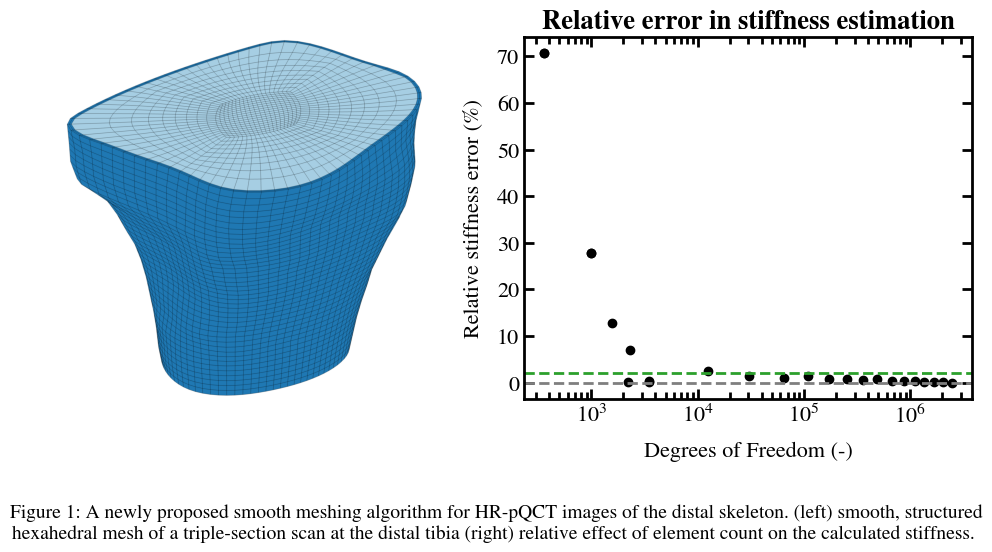

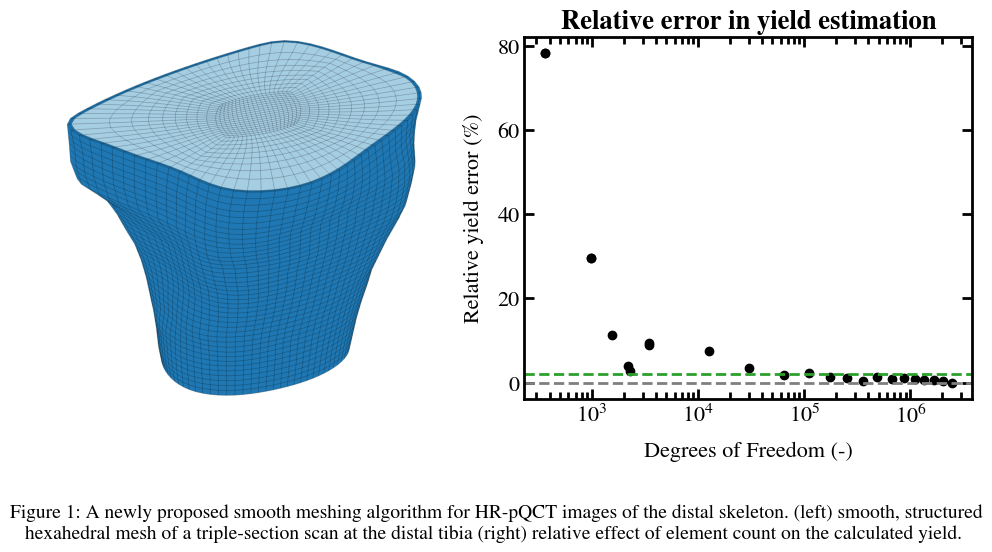

In [16]:
for df, df_name in zip(df_list, df_names):
    # sort by DOFs
    df = df.sort_values(by='DOFs')
    if df_name == 'stiffness':
        # print(df)
        last_stiffness_value = df['stiffness_1D_FZ_MAX'].iloc[-1]
        relative_error = 100 * np.abs(df['stiffness_1D_FZ_MAX'] - last_stiffness_value) / last_stiffness_value
        dofs = df['DOFs']
    else:
        # use 'Sample' as index
        last_yield_value = df['yield_force_FZ_MAX'].iloc[-1]
        relative_error = 100 * np.abs(df['yield_force_FZ_MAX'] - last_yield_value) / last_yield_value
        dofs = df['DOFs']

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(img)
    axs[0].axis('off')

    axs[1].scatter(dofs, relative_error, label='relative error', color='black', marker='o')
    axs[1].axhline(0, color='tab:grey', linestyle='--')
    axs[1].axhline(2, color='tab:green', linestyle='--')
    
    axs[1].set_xscale('log')
    axs[1].set_xlabel('Degrees of Freedom (-)')
    axs[1].set_ylabel(f'Relative {df_name} error (%)')
    axs[1].set_title(f'Relative error in {df_name} estimation', weight='bold')
    
    # Adjust the position of figtext
    txt=f"Figure 1: A newly proposed smooth meshing algorithm for HR-pQCT images of the distal skeleton. (left) smooth, structured hexahedral mesh of a triple-section scan at the distal tibia (right) relative effect of element count on the calculated {df_name}. "
    fig.text(0.5, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=14)
    
    plt.subplots_adjust(left=0.01, right=0.99, top=0.9, bottom=0.12)  # Adjust the subplot layout

    plt.savefig(f'mesh-sensitivity-{df_name}.png', dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()
    plt.close()


```yaml
hydra:
  run:
    dir: outputs/${now:%Y-%m-%d}/${now:%H-%M-%S}
  sweep:
    dir: multirun/${now:%Y-%m-%d}/${now:%H-%M-%S}
    subdir: ${hydra.job.num}
  launcher:
    _target_: hydra._internal.core_plugins.basic_launcher.BasicLauncher
  sweeper:
    _target_: hydra._internal.core_plugins.basic_sweeper.BasicSweeper
    max_batch_size: null
    params:
      meshing_settings.sweep_factor: range(1, 10)
  help:
    app_name: ${hydra.job.name}
    header: '${hydra.help.app_name} is powered by Hydra.

      '
    footer: 'Powered by Hydra (https://hydra.cc)

      Use --hydra-help to view Hydra specific help

      '
    template: '${hydra.help.header}

      == Configuration groups ==

      Compose your configuration from those groups (group=option)


      $APP_CONFIG_GROUPS


      == Config ==

      Override anything in the config (foo.bar=value)


      $CONFIG


      ${hydra.help.footer}

      '
  hydra_help:
    template: 'Hydra (${hydra.runtime.version})

      See https://hydra.cc for more info.


      == Flags ==

      $FLAGS_HELP


      == Configuration groups ==

      Compose your configuration from those groups (For example, append hydra/job_logging=disabled
      to command line)


      $HYDRA_CONFIG_GROUPS


      Use ''--cfg hydra'' to Show the Hydra config.

      '
    hydra_help: ???
  hydra_logging:
    version: 1
    formatters:
      simple:
        format: '[%(asctime)s][HYDRA] %(message)s'
    handlers:
      console:
        class: logging.StreamHandler
        formatter: simple
        stream: ext://sys.stdout
    root:
      level: INFO
      handlers:
      - console
    loggers:
      logging_example:
        level: DEBUG
    disable_existing_loggers: false
  job_logging:
    version: 1
    formatters:
      simple:
        format: '[%(asctime)s][%(name)s][%(levelname)s] - %(message)s'
    handlers:
      console:
        class: logging.StreamHandler
        formatter: simple
        stream: ext://sys.stdout
      file:
        class: logging.FileHandler
        formatter: simple
        filename: ${hydra.runtime.output_dir}/${hydra.job.name}.log
    root:
      level: INFO
      handlers:
      - console
      - file
    disable_existing_loggers: false
  env: {}
  mode: MULTIRUN
  searchpath: []
  callbacks: {}
  output_subdir: .hydra
  overrides:
    hydra: []
    task: []
  job:
    name: pipeline_runner
    chdir: null
    override_dirname: ''
    id: ???
    num: ???
    config_name: hfe
    env_set: {}
    env_copy: []
    config:
      override_dirname:
        kv_sep: '='
        item_sep: ','
        exclude_keys: []
  runtime:
    version: 1.3.2
    version_base: '1.3'
    cwd: /home/sp20q110/HFE
    config_sources:
    - path: hydra.conf
      schema: pkg
      provider: hydra
    - path: /home/sp20q110/HFE/02_CODE/cfg
      schema: file
      provider: main
    - path: ''
      schema: structured
      provider: schema
    output_dir: ???
    choices:
      hydra/env: default
      hydra/callbacks: null
      hydra/job_logging: default
      hydra/hydra_logging: default
      hydra/hydra_help: default
      hydra/help: default
      hydra/sweeper: basic
      hydra/launcher: basic
      hydra/output: default
  verbose: false
simulations:
  grayscale_filenames: C0003105
  folder_id:
    C0003105: 456_R_97_F
paths:
  origaimdir: 00_ORIGAIM/
  aimdir: 01_DATA/
  feadir: 04_SIMULATIONS/
  sumdir: 05_SUMMARIES/
  commondir: 01_DATA/BATCH/FEA_noReg/IMAGES/
  folder_bc_psl_loadcases: 02_CODE/abq/BC_PSL/
  boundary_conditions: 02_CODE/abq/BC_PSL/boundary_conditions.inp
  odb_OF_python_script: 02_CODE/src/hfe_abq/readODB_acc.py
  odb_python_script: 02_CODE/src/hfe_abq/readODB_acc.py
filenames:
  filename_postfix_cort_mask: _CORT_MASK_UNCOMP.AIM
  filename_postfix_trab_mask: _TRAB_MASK_UNCOMP.AIM
  filename_postfix_mask: _MASK.AIM
  filename_postfix_bmd: _UNCOMP.AIM
  filename_postfix_seg: _UNCOMP_SEG.AIM
  filename_postfix_common: _common_region_MASK.mhd
  filename_postfix_transform: _transformation.tfm
version:
  verification_files: 1
  current_version: 03_validation_smooth
  site_bone: Tibia
solver:
  site: remote
  abaqus: /var/DassaultSystemes/SIMULIA/Commands/abq2021hf4
socket_paths:
  workdir: /home/sp20q110/HFE
  scratchdir: /home/sp20q110/.SCRATCH
img_settings:
  img_basepath: 01_DATA
  meshpath: 03_MESH
  outputpath: 03_OUTPUT/MESHES/
meshing_settings:
  aspect: 100
  _slice: 1
  undersampling: 1
  slicing_coefficient: 6
  inside_val: 0
  outside_val: 1
  lower_thresh: 0
  upper_thresh: 0.9
  s: 25
  k: 3
  interp_points: 350
  thickness_tol: 0.5
  phases: 2
  center_square_length_factor: 0.4
  mesh_order: 1
  sweep_factor: 1
  n_elms_longitudinal: 10
  n_elms_transverse_trab: 15
  n_elms_transverse_cort: 3
  n_elms_radial: 25
  ellipsoid_fitting: true
  show_plots: false
  show_gmsh: false
  write_mesh: true
  trab_refinement: false
  mesh_analysis: true
mesher:
  meshing: spline
  element_size: 1.2747
  air_elements: false
image_processing:
  origaim_separate: false
  mask_separate: true
  imtype: NATIVE
  bvtv_scaling: 1
  bvtv_slope: 0.963
  bvtv_intercept: 0.03814
  BVTVd_comparison: true
  BVTVd_as_BVTV: false
  SEG_correction: true
  BMC_conservation: false
homogenization:
  fabric_type: local
  roi_bvtv_size: 5
  STL_tolerance: 0.2
  ROI_kernel_size_cort: 5
  ROI_kernel_size_trab: 5
  ROI_BVTV_size_cort: 1.4
  ROI_BVTV_size_trab: 4.0
  isotropic_cortex: false
  orthotropic_cortex: true
loadcase:
  full_nonlinear_loadcases: false
  BC_mode: 0
  control: displacement
  start_step_size: 0.2
  time_for_displacement: 1
  min_step_size: 1.0e-10
  max_step_size: 0.3
  load_displacement: -0.4
abaqus:
  nlgeom: true
  abaqus_nprocs: 8
  abaqus_memory: 6000
  delete_odb: false
  max_increments: 1000
  umat: 02_CODE/abq/UMAT_BIPHASIC.f
registration:
  registration: false
optimization:
  fz_max_factor: 0.5
  fx_fy_max_factor: 1.3
  mx_my_max_factor: 1
  mz_max_factor: 0.8
old_cfg:
  nphases: 1
  ftype: iso
  verification_file: 1
  all_mask: true
  adjust_element_size: true
```